In [ ]:
 from google.colab import files
 files.upload()

Saving vgames2.csv to vgames2 (1).csv


{'vgames2.csv': b'"","Name","Platform","Year","Genre","Publisher","NA_Sales","EU_Sales","JP_Sales","Other_Sales"\n"1","Candace Kane\'s Candy Factory","DS","2008","Action","Destineer","0.04","0","0","0"\n"2","The Munchables","Wii","2009","Action","Namco Bandai Games","0.17","0","0","0.01"\n"3","Otome wa Oanesama Boku ni Koi Shiteru Portable","PSP","2010","Adventure","Alchemist","0","0","0.02","0"\n"4","Deal or No Deal: Special Edition","DS","2010","Misc","Zoo Games","0.04","0","0","0"\n"5","Ben 10 Ultimate Alien: Cosmic Destruction","PS3","2010","Platform","D3Publisher","0.12","0.09","0","0.04"\n"6","Power Pro Kun Pocket 8","DS","2005","Sports","Konami Digital Entertainment","0","0","0.14","0"\n"7","JASF: Jane\'s Advanced Strike Fighters","PC","2011","Simulation","Deep Silver","0.02","0.01","0","0"\n"8","Samurai Warriors: State of War","PSP","2005","Action","Tecmo Koei","0.07","0","0.11","0.01"\n"9","Imabikisou","PS3","2007","Adventure","Sega","0","0","0.04","0"\n"10","The Penguins of M

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats

In [ ]:
df = pd.read_csv('vgames2.csv')

In [ ]:
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
df.duplicated().sum()
df.isnull().sum()
df= df.dropna(axis=0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16241 non-null  int64  
 1   Name         16241 non-null  object 
 2   Platform     16241 non-null  object 
 3   Year         16241 non-null  float64
 4   Genre        16241 non-null  object 
 5   Publisher    16241 non-null  object 
 6   NA_Sales     16241 non-null  object 
 7   EU_Sales     16241 non-null  object 
 8   JP_Sales     16241 non-null  object 
 9   Other_Sales  16241 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.4+ MB


In [ ]:
df = df[df.Year>1900].reset_index()

In [ ]:
df.shape

(16141, 11)

In [ ]:
les = df.loc[df.NA_Sales.str.contains('K')]
les['NA_Sales']=les.NA_Sales.str.replace('K','').astype('float')
les['NA_Sales'] = les['NA_Sales']/1000
df['NA_Sales'].loc[df.NA_Sales.str.contains('K')] = les['NA_Sales']
df=df.astype('str')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

In [ ]:
les = df.loc[df.NA_Sales.str.contains('M')]
les['NA_Sales']=les.NA_Sales.str.replace('M','').astype('float')
les['NA_Sales'] = les['NA_Sales']
df['NA_Sales'].loc[df.NA_Sales.str.contains('M')] = les['NA_Sales']
df=df.astype('str')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
les = df.loc[df.EU_Sales.str.contains('K')]
les['EU_Sales']=les.EU_Sales.str.replace('K','').astype('float')
les['EU_Sales'] = les['EU_Sales']/1000
df['EU_Sales'].loc[df.EU_Sales.str.contains('K')] = les['EU_Sales']
df=df.astype('str')
les = df.loc[df.EU_Sales.str.contains('M')]
les['EU_Sales']=les.EU_Sales.str.replace('M','').astype('float')
les['EU_Sales'] = les['EU_Sales']
df['EU_Sales'].loc[df.EU_Sales.str.contains('M')] = les['EU_Sales']
df=df.astype('str')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
les = df.loc[df.JP_Sales.str.contains('K')]
les['JP_Sales']=les.JP_Sales.str.replace('K','').astype('float')
les['JP_Sales'] = les['JP_Sales']/1000
df['JP_Sales'].loc[df.JP_Sales.str.contains('K')] = les['JP_Sales']
df=df.astype('str')
les = df.loc[df.JP_Sales.str.contains('M')]
les['JP_Sales']=les.JP_Sales.str.replace('M','').astype('float')
les['JP_Sales'] = les['JP_Sales']
df['JP_Sales'].loc[df.JP_Sales.str.contains('M')] = les['JP_Sales']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
les = df.loc[df.Other_Sales.str.contains('K')]
les['Other_Sales']=les.Other_Sales.str.replace('K','').astype('float')
les['Other_Sales'] = les['Other_Sales']/1000
df['Other_Sales'].loc[df.Other_Sales.str.contains('K')] = les['Other_Sales']
df=df.astype('str')
les = df.loc[df.Other_Sales.str.contains('M')]
les['Other_Sales']=les.Other_Sales.str.replace('M','').astype('float')
les['Other_Sales'] = les['Other_Sales']
df['Other_Sales'].loc[df.Other_Sales.str.contains('M')] = les['Other_Sales']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
df.iloc[446]

index                  458
Unnamed: 0             459
Name               F1 2010
Platform               PS3
Year                2010.0
Genre               Racing
Publisher      Codemasters
NA_Sales              0.25
EU_Sales              0.76
JP_Sales              0.08
Other_Sales           0.27
Name: 446, dtype: object

In [ ]:
df['NA_Sales']=df.NA_Sales.astype('float')

In [ ]:
df['EU_Sales']=df.EU_Sales.astype('float')
df['JP_Sales']= df.JP_Sales.astype('float')
df['Other_Sales']=df.Other_Sales.astype('float')

In [ ]:
df['total_sales'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']

In [ ]:
df['Year']=df['Year'].astype('float')

In [ ]:
df['Year']=df['Year'].astype('int')

In [ ]:
df = df.reset_index(drop=True) #인덱스 재정렬

In [ ]:
df1 = df[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales','total_sales']]

In [ ]:
df1_group = df1.groupby(['Genre']).sum()

In [ ]:
df1_group = df1_group.reset_index()

In [ ]:
df1_group

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,Action,855.96,512.52,155.73,183.64,1707.85
1,Adventure,101.33,63.32,51.79,16.64,233.08
2,Fighting,220.11,99.72,86.39,36.10,442.32
3,Misc,394.29,207.68,103.71,72.54,778.22
4,Platform,442.46,199.40,129.22,51.15,822.23
5,Puzzle,121.00,50.39,56.19,12.39,239.97
6,Racing,353.57,234.20,55.42,76.23,719.42
7,Role-Playing,307.08,176.31,336.25,54.71,874.35
8,Shooter,570.89,307.26,37.34,100.82,1016.31
9,Simulation,181.04,112.68,63.46,31.24,388.42


In [ ]:
df1_melt = pd.melt(df1_group, id_vars=['Genre'],var_name='nation',value_name='sales')

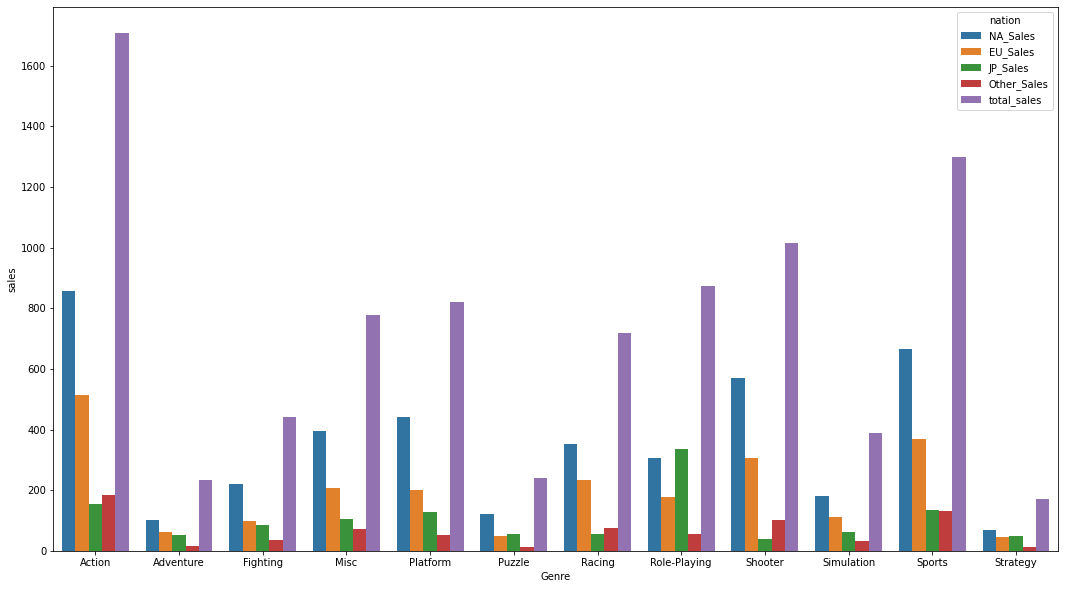

In [ ]:
plt.figure(figsize = (18, 10))
sns.barplot(data=df1_melt,x='Genre',y='sales',hue='nation')

In [ ]:
def top3_genre(df, sales_col):
    new_df = df.loc[:, ['Genre', sales_col]].sort_values(by=sales_col, ascending=False).reset_index(drop=True).head(3)
    new_df.columns = ['Genre', 'Sales']
    return new_df

na_genre_top3 = top3_genre(df1_group, 'NA_Sales')
eu_genre_top3 = top3_genre(df1_group, 'EU_Sales')
jp_genre_top3 = top3_genre(df1_group, 'JP_Sales')
other_genre_top3 = top3_genre(df1_group, 'Other_Sales')

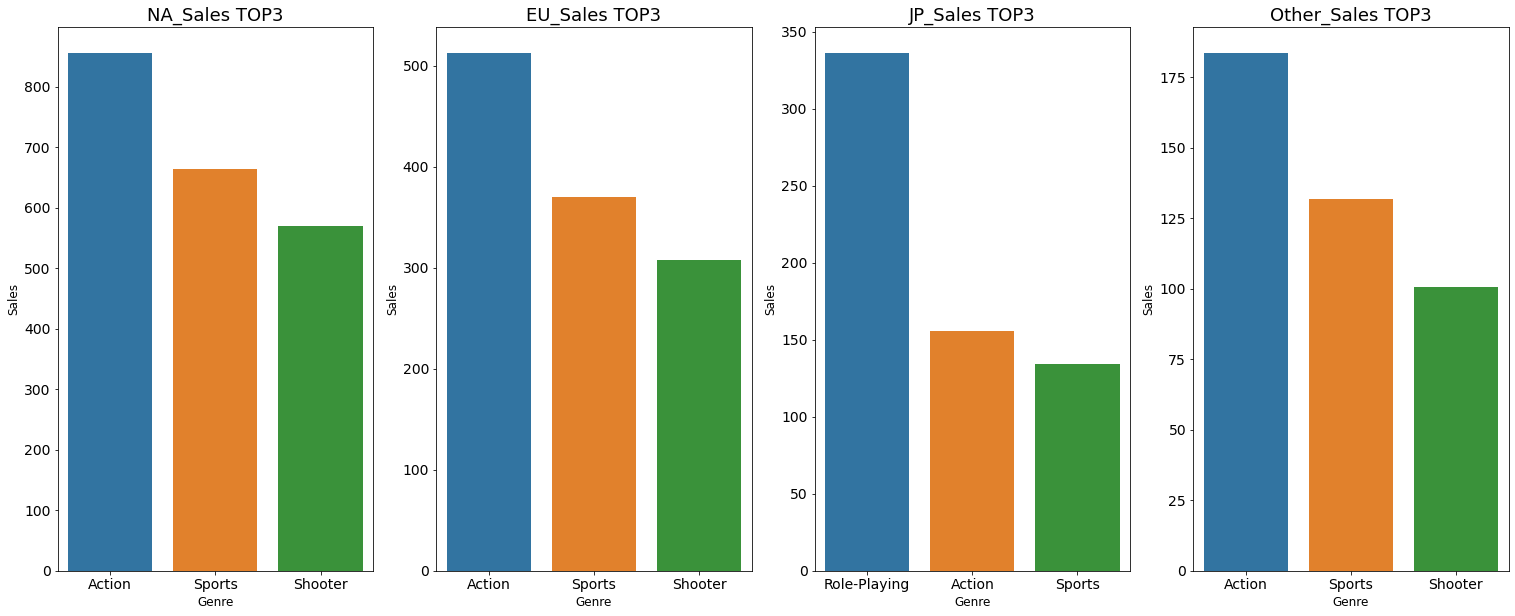

In [ ]:
data_list = [na_genre_top3, eu_genre_top3, jp_genre_top3, other_genre_top3]
columns_list = df1_group.columns[1:]
fig, axs = plt.subplots(figsize=(26, 10), nrows=1, ncols=4)
for col, i, data in zip(columns_list, range(len(columns_list)), data_list):
    axs[i].set_title(col + ' ' + 'TOP3', fontsize=18)
    sns.barplot(x='Genre', y='Sales', data=data, ax=axs[i])
    axs[i].tick_params(axis='both',labelsize=14)
    axs[i].set_xlabel('Genre', fontsize=12)
    axs[i].set_ylabel('Sales', fontsize=12)
plt.show()

In [ ]:
df2 = df.groupby(['Year','Genre'])['total_sales'].sum()

In [ ]:
df2 = df2.reset_index()
df2

,Year,Genre,total_sales
0,1980,Action,0.34
1,1980,Fighting,0.77
2,1980,Misc,2.70
3,1980,Shooter,7.07
4,1981,Action,14.79
...,...,...,...
383,2016,Sports,14.46
384,2016,Strategy,0.52
385,2017,Action,0.01
386,2017,Role-Playing,0.04


In [ ]:
df2['Year']=df2['Year'].astype('float')

In [ ]:
df2['Year']=df2['Year'].astype('int')

In [ ]:
df2_max=df2.loc[df2.groupby(['Year'])['total_sales'].idxmax()]

In [ ]:
genre = df2_max['Genre'].values

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text major ticklabel objects>)

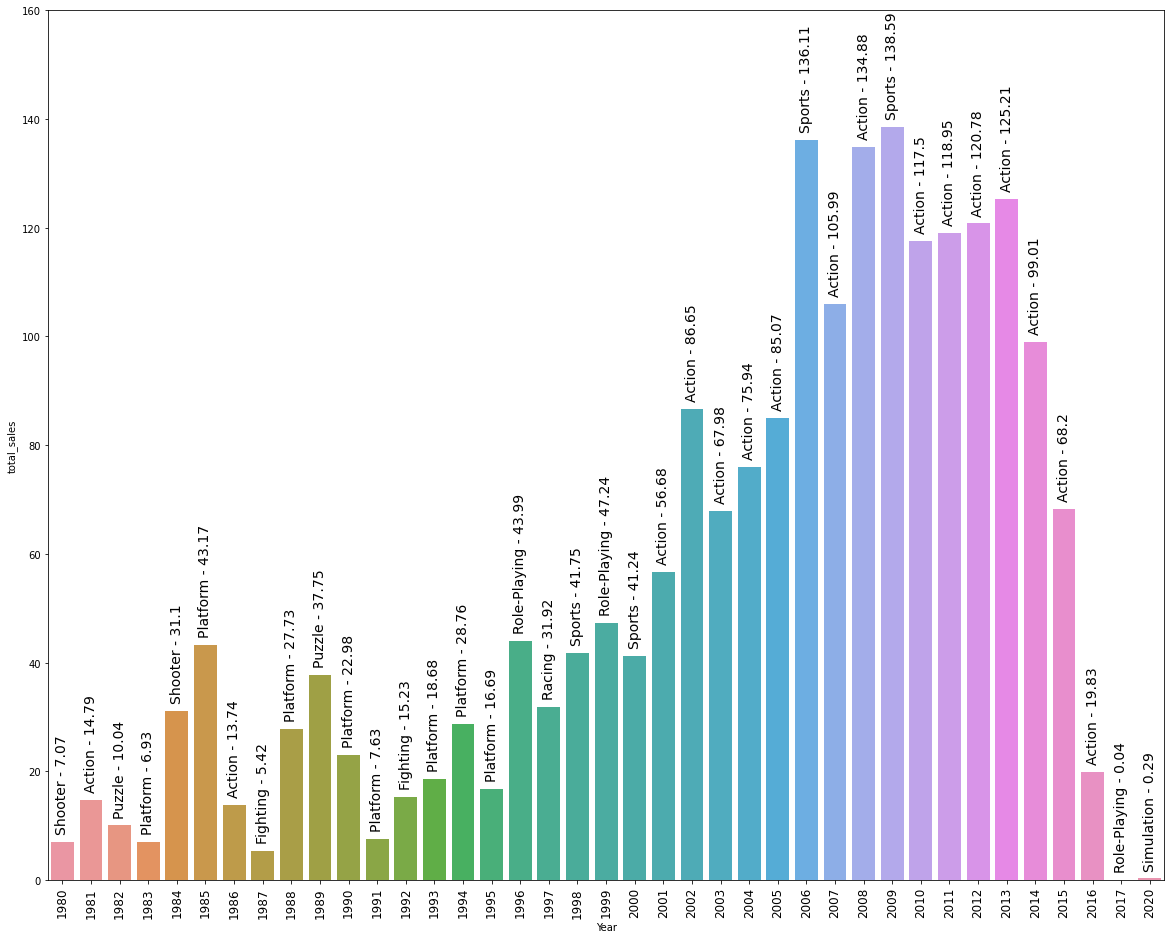

In [ ]:
plt.figure(figsize = (20, 16))
ax = sns.barplot(data=df2_max,x='Year',y='total_sales')
idx = 0
for value in df2_max['total_sales']:
    ax.text(x=idx, y=value + 2, s=str(genre[idx] + ' ' + '-' + ' ' + str(round(value, 2))),
            color='black', size=14, rotation=90, ha='center')
    idx += 1
ax.set_ylim(0, 160)
plt.xticks(rotation=90, fontsize=12)

In [ ]:
top10 = df.loc[df.total_sales.sort_values(ascending=False).index].reset_index(drop=True).head(10)
rank = [str(x) for x in range(1, 11)]
top10['rank'] = rank
top10

,index,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales,rank
0,2908,2909,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1
1,4199,4200,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,2
2,12579,12580,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,3
3,3352,3353,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,4
4,7829,7830,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,5
5,1203,1204,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,6
6,6937,6938,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,7
7,3014,3015,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01,8
8,16531,16532,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61,9
9,10488,10489,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,10


Text(0.5, 1.0, 'Sales TOP10 Game')

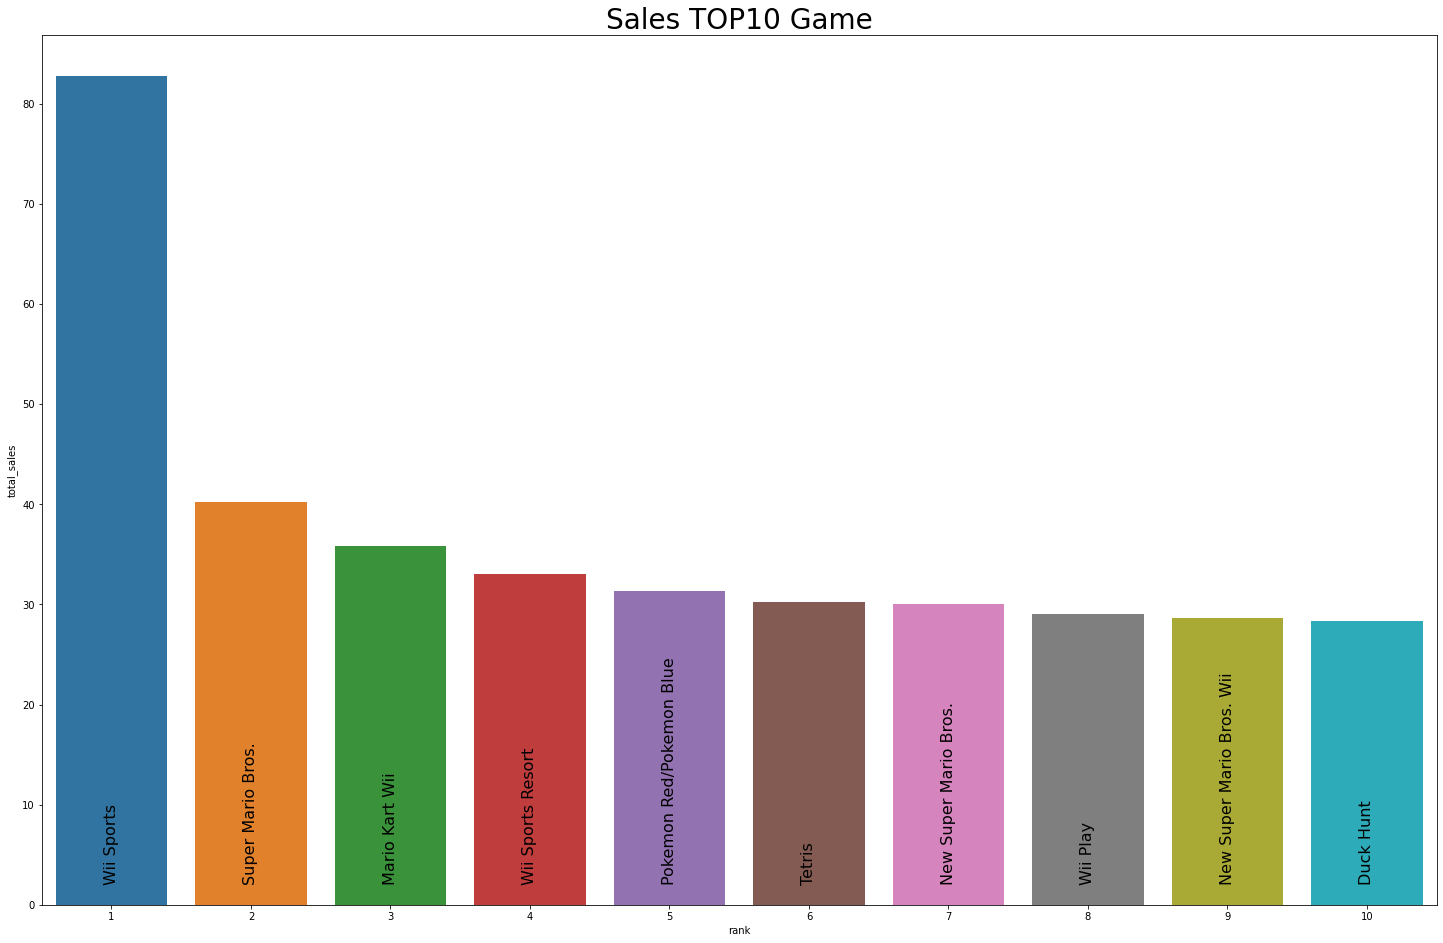

In [ ]:
plt.figure(figsize = (25, 16))
a = sns.barplot(data=top10,x='rank',y='total_sales')
i = 0
for name in top10['Name']:
    a.text(x=i, y=value + 2, s=str(name), color='black', rotation =90, size=16, ha='center')
    i+=1
a.set_title('Sales TOP10 Game', fontsize=28)

In [ ]:
df3 = df[['Platform','NA_Sales','EU_Sales','JP_Sales','Other_Sales','total_sales']]
df3_group = df3.groupby(['Platform']).sum()

In [ ]:
df3_group=df3_group.reset_index()

In [ ]:
df3_melt = pd.melt(df3_group, id_vars=['Platform'],var_name='nation',value_name='sales')

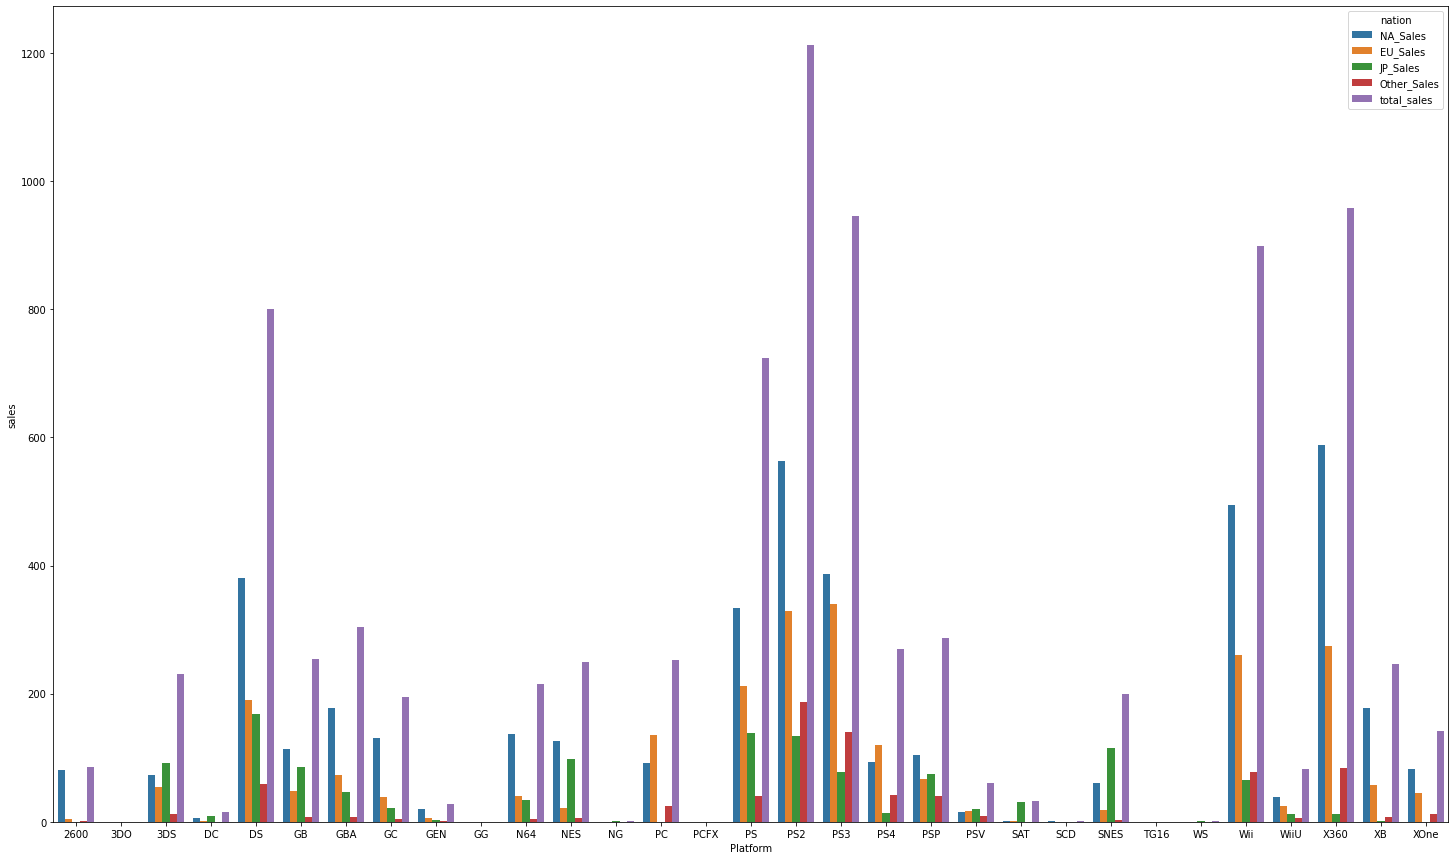

In [ ]:
plt.figure(figsize = (25, 15))
sns.barplot(data=df3_melt,x='Platform',y='sales',hue='nation')

In [ ]:
def top5_platform(df, sales_col):
    new_df = df.loc[:, ['Platform', sales_col]].sort_values(by=sales_col, ascending=False).reset_index(drop=True).head(5)
    new_df.columns = ['Platform', 'Sales']
    return new_df

na_platform_top5 = top5_platform(df3_group, 'NA_Sales')
eu_platform_top5 = top5_platform(df3_group, 'EU_Sales')
jp_platform_top5 = top5_platform(df3_group, 'JP_Sales')
other_platform_top5 = top5_platform(df3_group, 'Other_Sales')
total_platform_top5 = top5_platform(df3_group, 'total_sales')

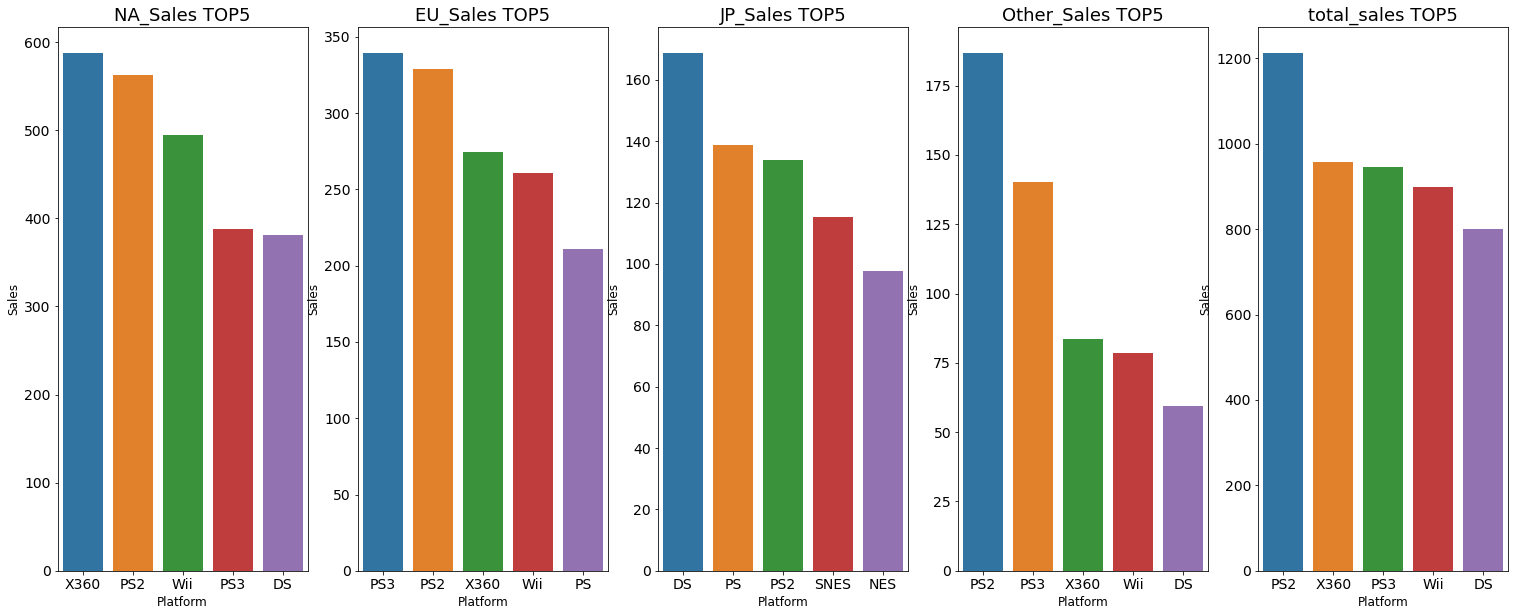

In [ ]:
data_list = [na_platform_top5, eu_platform_top5, jp_platform_top5, other_platform_top5, total_platform_top5 ]
columns_list = df1_group.columns[1:]
fig, axs = plt.subplots(figsize=(26, 10), nrows=1, ncols=5)
for col, i, data in zip(columns_list, range(len(columns_list)), data_list):
    axs[i].set_title(col + ' ' + 'TOP5', fontsize=18)
    sns.barplot(x='Platform', y='Sales', data=data, ax=axs[i])
    axs[i].tick_params(axis='both',labelsize=14)
    axs[i].set_xlabel('Platform', fontsize=12)
    axs[i].set_ylabel('Sales', fontsize=12)
plt.show()

In [ ]:
df4 = df.groupby(['Year','Platform'])['total_sales'].sum().reset_index()

In [ ]:
df4_max=df4.loc[df4.groupby(['Year'])['total_sales'].idxmax()]
platform = df4_max['Platform'].values

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text major ticklabel objects>)

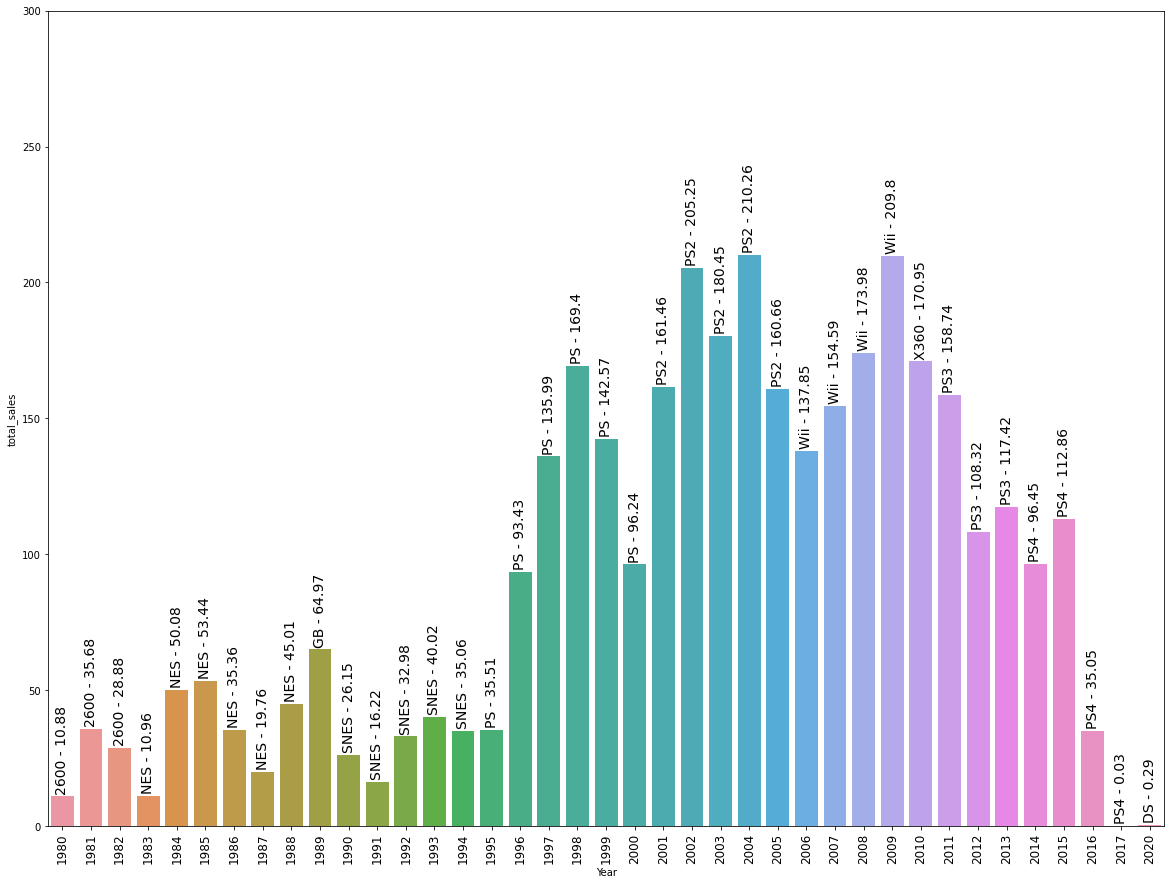

In [ ]:
plt.figure(figsize = (20, 15))
ax = sns.barplot(data=df4_max,x='Year',y='total_sales')
idx = 0
for value in df4_max['total_sales']:
    ax.text(x=idx, y=value + 2, s=str(platform[idx] + ' ' + '-' + ' ' + str(round(value, 2))),
            color='black', size=14, rotation=90, ha='center')
    idx += 1
ax.set_ylim(0, 300)
plt.xticks(rotation=90, fontsize=12)

In [ ]:
action=df1[df1['Genre']=='Action']
action=action[['total_sales']]
action.mean()

total_sales    0.529402
dtype: float64

In [ ]:
action

,total_sales
0,0.04
1,0.18
7,0.19
9,0.08
15,0.36
...,...
16119,1.08
16125,0.27
16127,1.43
16137,0.01


In [ ]:
sports=df1[df1['Genre']=='Sports']
sports=sports[['total_sales']]
sports.mean()

total_sales    0.568078
dtype: float64

In [ ]:
sports

,total_sales
5,0.14
17,0.03
22,0.10
23,0.01
38,0.24
...,...
16114,0.25
16130,0.09
16132,0.13
16134,4.53


In [ ]:
shooter=df1[df1['Genre']=='Shooter']
shooter=shooter[['total_sales']]
shooter.mean()

total_sales    0.801506
dtype: float64

In [ ]:
shooter

,total_sales
27,0.29
31,0.16
43,0.93
59,0.48
62,0.01
...,...
16095,0.52
16096,0.22
16097,3.51
16128,0.06


In [ ]:
s1 = []

np.random.seed(1)

for _ in range(10000):
  sample = np.random.choice(action['total_sales'], replace=True)
  s1.append(sample.mean())
s1 = np.array(s1)
s1_mean = s1.mean()
round(s1_mean,2)

s2 = []

for _ in range(10000):
  sample = np.random.choice(sports['total_sales'], replace=True)
  s2.append(sample.mean())
s2 = np.array(s2)
s2_mean = s2.mean()
round(s2_mean,2)

s3 = []

for _ in range(10000):
  sample = np.random.choice(shooter['total_sales'], replace=True)
  s3.append(sample.mean())
s3 = np.array(s3)
s3_mean = s3.mean()
round(s1_mean,2),round(s2_mean,2),round(s3_mean,2)

(0.54, 0.58, 0.82)

In [ ]:
pv1 = stats.ttest_ind(s2,s1,equal_var=False).pvalue
pv1

0.18

In [ ]:
pv2 = stats.ttest_ind(s3,s1,equal_var=False).pvalue
pv2

9.515106544437223e-35

In [ ]:
pv3 = stats.ttest_ind(s2,s3,equal_var=False).pvalue
pv3

3.3426352154476453e-15

귀무가설 : 액션장르와 스포츠장르의 평균매출량은 통계적으로 유의한 차이가 없다.

대립가설 : 액션장르와 스포츠장르의 평균매출량은 통계적으로 유의한 차이가 있다.

결론 : p벨류값이 0.05보다 크므로 귀무가설을 기각하지못한다.

귀무가설 : 액션장르와 슈터장르의 평균매출량은 통계적으로 유의한 차이가 없다.

대립가설 : 액션장르와 슈터장르의 평균매출량은 통계적으로 유의한 차이가 있다.

결론 : p벨류값이 0.05보다 작으므로 귀무가설을 기각한다.


귀무가설 : 스포츠장르와 슈터장르의 평균매출량은 통계적으로 유의한 차이가 없다.

대립가설 : 스포츠장르와 슈터장르의 평균매출량은 통계적으로 유의한 차이가 있다.

결론 : p벨류값이 0.05보다 작으므로 귀무가설을 기각한다.